conda install -c conda-forge imbalanced-learn


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling  import SMOTE

#model score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Reading the data
df = pd.read_csv('Data-CustomerChurn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# checking for null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        11000 non-null  int64  
 1   CustomerId       11000 non-null  int64  
 2   Surname          11000 non-null  object 
 3   CreditScore      11000 non-null  int64  
 4   Geography        11000 non-null  object 
 5   Gender           11000 non-null  object 
 6   Age              11000 non-null  int64  
 7   Tenure           11000 non-null  int64  
 8   Balance          11000 non-null  float64
 9   NumOfProducts    11000 non-null  int64  
 10  HasCrCard        11000 non-null  int64  
 11  IsActiveMember   11000 non-null  int64  
 12  EstimatedSalary  11000 non-null  float64
 13  Exited           11000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


There are no missing values

In [4]:
#checking for duplicated values
df.duplicated().sum()

0

In [5]:
# Checking for unique values
df.nunique(axis=0)

RowNumber          11000
CustomerId         11000
Surname             3085
CreditScore          463
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance             7003
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    10999
Exited                 2
dtype: int64

In [6]:
#Statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,11000.000000,1.100000e+04,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,5500.500000,1.569110e+07,651.152273,39.035273,4.998909,76365.356348,1.529364,0.703182,0.516364,100218.432679,0.208818
std,3175.570815,7.204456e+04,108.408610,12.410576,2.894075,62448.450415,0.582382,0.456876,0.499755,57541.220047,0.406483
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2750.750000,1.562855e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50825.857500,0.000000
50%,5500.500000,1.569115e+07,652.000000,37.000000,5.000000,97267.100000,1.000000,1.000000,1.000000,100565.590000,0.000000
75%,8250.250000,1.575360e+07,718.000000,44.000000,7.000000,127665.115000,2.000000,1.000000,1.000000,149472.020000,0.000000
max,11000.000000,1.581569e+07,5777.000000,555.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Looking at the Age variable from the descriptive statistics above, it is easy to detect an outlier. The maximum age is 555. This could be  due to data entry error.
#### Also the Credit score variable has a maximum value of 5777. This is also an error, because credit score value usually ranges from 300 to 850
#### Let's take a look at rows that have these extreme outliers.

In [7]:
#Row with credit score value higher than 850
df.loc[df['CreditScore'] > 850]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5060,5061,15681928,Yancy,5777,France,Female,35,4,108155.49,1,1,0,105407.79,0


In [8]:
#Row with age higher than 100
df.loc[df['Age'] > 100]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10819,10820,15662636,Maurice,714,Spain,Male,500,2,132649.51,1,1,0,106375.26,0
10990,10991,15602856,Faith,802,France,Female,555,4,107137.84,1,1,1,182054.40,1


#### The rows with these extreme outliers have been listed above so the data can be crosschecked from the source.
#### For now, extreme outliers in the age and creditscore column would be treated as data entry error, i.e Age column that has a value of 50 might have been mistakenly inputed as 500, and age 55 as 555

In [9]:
#Replace age variable 500 with 50, and 555 with 55
df['Age'] = df['Age'].replace([500, 555], [50, 55,])
#Replace credit score value 5777 with 577
df['CreditScore'] = df['CreditScore'].replace(5777, 577)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Descriptive statistics after extreme outliers have been replaced
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,11000.000000,1.100000e+04,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,5500.500000,1.569110e+07,650.679545,38.948909,4.998909,76365.356348,1.529364,0.703182,0.516364,100218.432679,0.208818
std,3175.570815,7.204456e+04,96.767308,10.513142,2.894075,62448.450415,0.582382,0.456876,0.499755,57541.220047,0.406483
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2750.750000,1.562855e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50825.857500,0.000000
50%,5500.500000,1.569115e+07,652.000000,37.000000,5.000000,97267.100000,1.000000,1.000000,1.000000,100565.590000,0.000000
75%,8250.250000,1.575360e+07,718.000000,44.000000,7.000000,127665.115000,2.000000,1.000000,1.000000,149472.020000,0.000000
max,11000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Text(0.5, 0, 'creditscore')

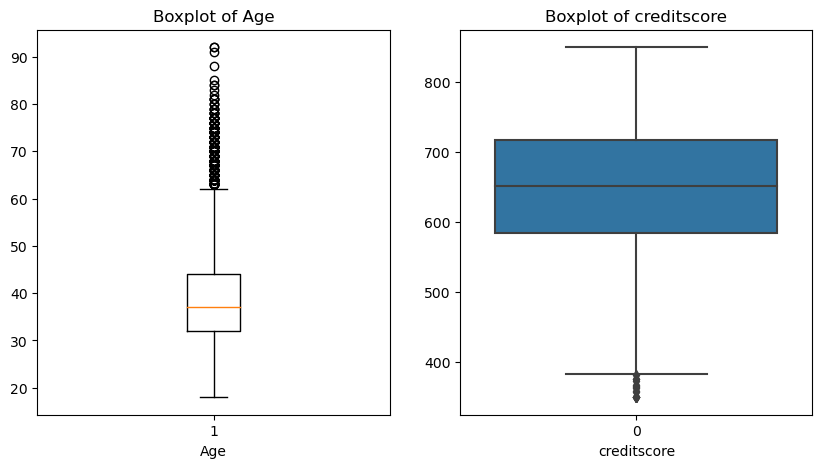

In [11]:
# Plotting boxplot of Age and Credit score
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.subplot(1,2,2)
sns.boxplot(df['CreditScore'])
plt.title('Boxplot of creditscore')
plt.xlabel('creditscore')

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
#dropping irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace =True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10995,531,France,Female,34,10,118306.79,1,1,0,26493.05,0
10996,575,Germany,Male,49,2,136822.70,1,1,0,2487.74,0
10997,520,France,Female,74,4,0.00,1,0,0,26742.92,0
10998,675,Spain,Male,23,8,0.00,2,0,0,162342.21,0


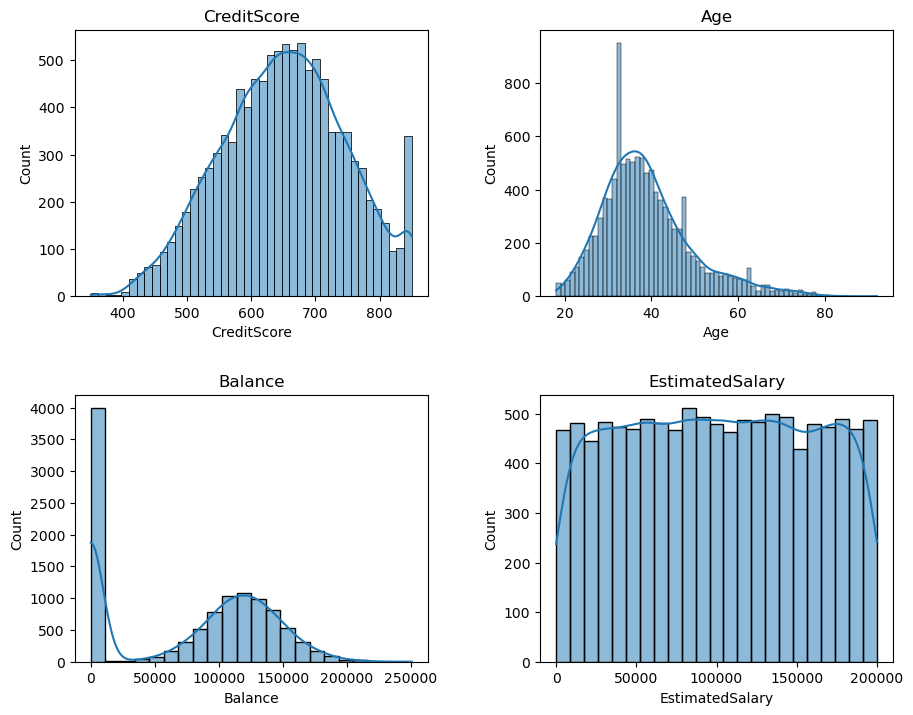

In [14]:
# Check distribution of each numeric column
numeric_cols =[ 'CreditScore', 'Age',
       'Balance','EstimatedSalary']

fig,ax=plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=5.0)
k=0

for i in range(2):
    for j in range(2):
        sns.histplot(df[numeric_cols[k]],ax=ax[i,j],kde=True)
        ax[i,j].title.set_text(numeric_cols[k])
        k+=1

#### The credit score column is left skewed
#### The age column is right skewed
#### The balance is almost a normal distribution except for the first bar

### Plotting attributes of categorical column

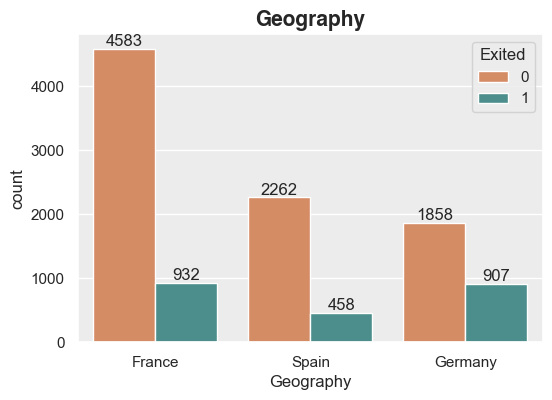

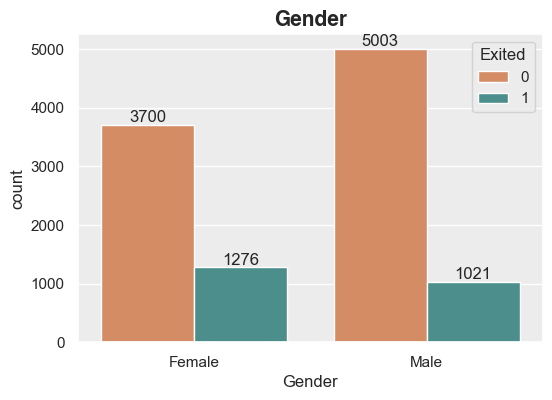

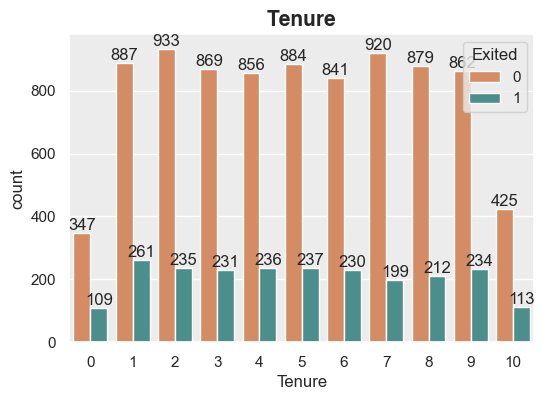

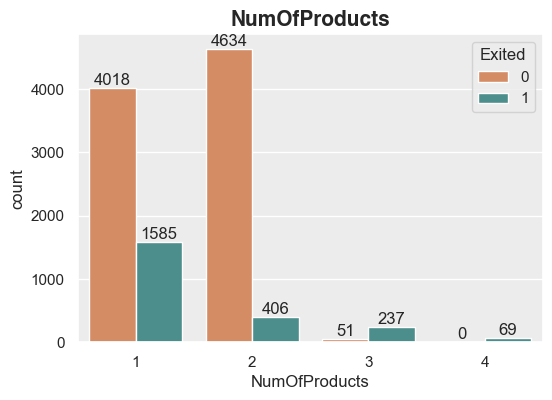

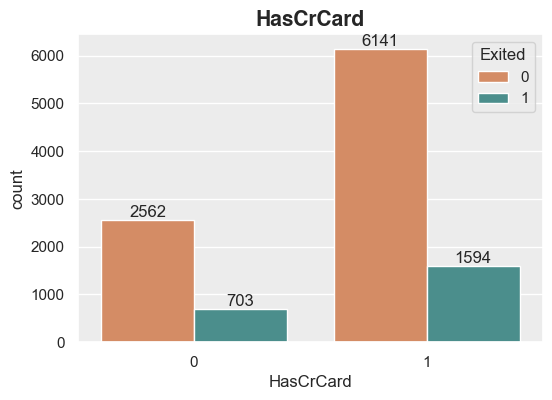

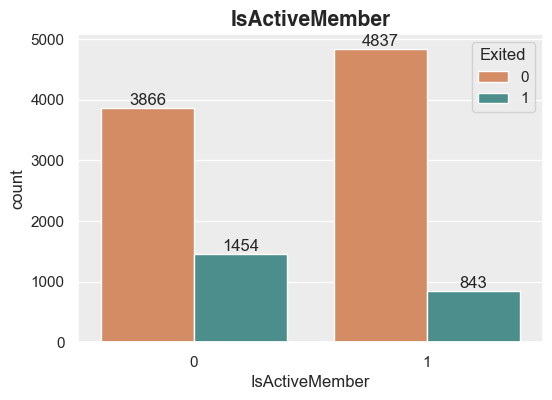

In [15]:
#create a list of categorical features and plot them
list_of_cat_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(6, 4)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited', palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

#### Customers in Germany have a high churn rate
#### Customers with 3 or 4 products have higher chances to churn
#### inactive customers have higher chances to churn 

### Analyzing relationship between variables


In [16]:
# checking correlation coefficient
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004083,-0.000463,0.005074,0.013043,0.000818,0.023845,0.000800,-0.022446
Age,-0.004083,1.000000,-0.012564,0.030423,-0.029394,-0.013530,0.085107,-0.005736,0.287456
Tenure,-0.000463,-0.012564,1.000000,-0.008249,0.011778,0.021690,-0.024189,0.009157,-0.017350
Balance,0.005074,0.030423,-0.008249,1.000000,-0.303984,-0.008205,-0.008557,0.017199,0.117780
NumOfProducts,0.013043,-0.029394,0.011778,-0.303984,1.000000,0.006961,0.010063,0.012532,-0.049524
HasCrCard,0.000818,-0.013530,0.021690,-0.008205,0.006961,1.000000,-0.009187,-0.009561,-0.010383
IsActiveMember,0.023845,0.085107,-0.024189,-0.008557,0.010063,-0.009187,1.000000,-0.002913,-0.153551
EstimatedSalary,0.000800,-0.005736,0.009157,0.017199,0.012532,-0.009561,-0.002913,1.000000,0.011361
Exited,-0.022446,0.287456,-0.017350,0.117780,-0.049524,-0.010383,-0.153551,0.011361,1.000000


<Axes: >

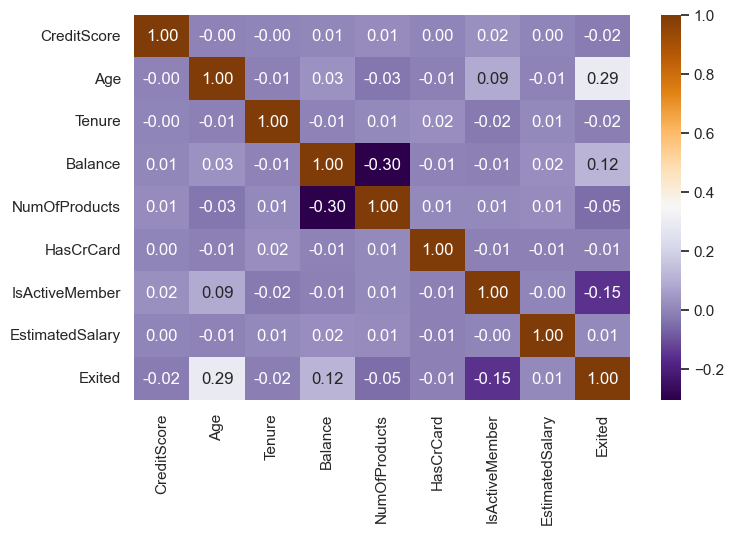

In [17]:
# Visualizing correlation
plt.figure(figsize = (8 ,5))
sns.heatmap(df.corr() ,cbar = True , annot = True ,cmap ='PuOr_r' ,fmt='.2f' ,annot_kws={"size": 12})

#### Transforming categorical variables to numerical using one hot encoder, in order to be able to provide these attributes as input for machine learning models. 




In [18]:
#select categorical columns
df.select_dtypes('object').columns

Index(['Geography', 'Gender'], dtype='object')

In [19]:
df = pd.get_dummies(df , drop_first = True)
#drop first  = true, in order to remove dummy variable trap

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


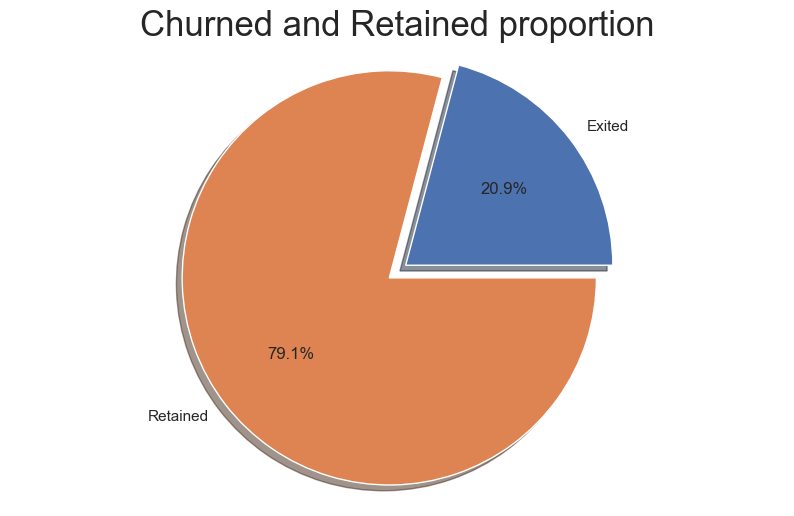

In [21]:
# percentage of customers that churned and stayed
fig, axs = plt.subplots(figsize=(10, 6))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()

#### From the chart above, 20.9% of customers left the bank

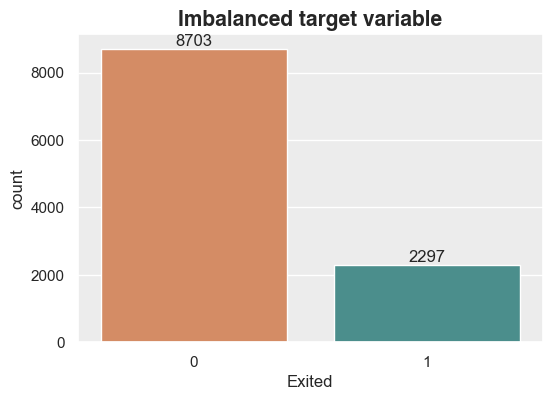

In [22]:
#plotting 'Exited' or target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(6, 4))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=df['Exited'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['Exited'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

#### The target variable "Exited" is highly imbalanced, it would be balanced in order to be able to implement various machine learning models with fair, unbiased results. This would be done using SMOTE technique, which would generate equal number of values for both class 0 and 1 of the target variable 'Exited'

In [23]:
# Split data
x = df.drop('Exited' , axis =1)
y = df['Exited']

In [24]:
# Implementing SMOTE technique
smt = SMOTE()
x_res , y_res  = smt.fit_resample(x,y)
y_res.value_counts()

1    8703
0    8703
Name: Exited, dtype: int64

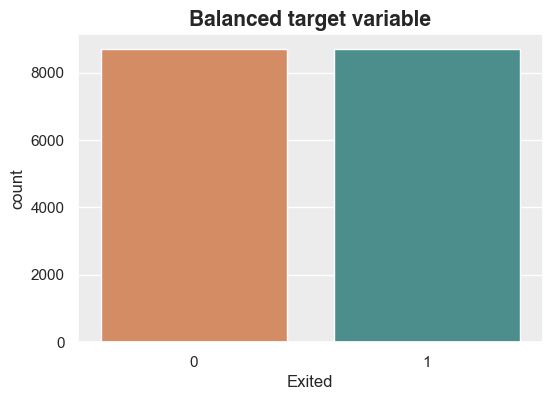

In [25]:
#plotting the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(6, 4))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y_res, data=df, palette=palette_features)
plt.show()

In [26]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size= 0.3, random_state= 42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(12184, 11) (5222, 11) (12184,) (5222,)


#### Data would be scaled using Robust Scaler. This is due to the fact that there are still outliers present in our data.
#### Robust scaler uses median and IQR when scaling input values. Both of these statistics are resistant to outliers, thereby making Robust scaler immune to the adverse effect of these outliers.

In [27]:
# Scaling data using Robust scaler
rc = RobustScaler()
x_train = rc.fit_transform(x_train)
x_test = rc.transform(x_test)

In [28]:
x_train

array([[-0.02419355, -0.38461538, -0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-0.48387097, -0.84615385, -0.75      , ...,  0.        ,
         1.        ,  0.        ],
       [-0.36290323,  2.69230769, -0.75      , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.68548387, -0.15384615, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13709677,  0.23076923,  0.75      , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.09677419,  0.69230769,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Applying different models 

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

ytest_pred = lr.predict(x_test)

#finding different scores
acc1 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('LOGISTIC REGRESSION ACCURACY : ',acc1)
print('LOGISTIC REGRESSION PRECISON : ',pre)
print('LOGISTIC REGRESSION RECALL : ',rec)
print('LOGISTIC REGRESSION F1_SCORE : ',f1)

LOGISTIC REGRESSION ACCURACY :  0.7859057832248181
LOGISTIC REGRESSION PRECISON :  0.7787009063444109
LOGISTIC REGRESSION RECALL :  0.79491133384734
LOGISTIC REGRESSION F1_SCORE :  0.7867226249523084


In [30]:
# Support Vector Machine (SVM)
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train , y_train)

ytest_pred = svm.predict(x_test)

#finding different scores
acc2 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('SUPPORT VECTOR MACHINE ACCURACY : ',acc2)
print('SUPPORT VECTOR MACHINE PRECISON : ',pre)
print('SUPPORT VECTOR MACHINE RECALL : ',rec)
print('SUPPORT VECTOR MACHINE F1_SCORE : ',f1)

SUPPORT VECTOR MACHINE ACCURACY :  0.830716200689391
SUPPORT VECTOR MACHINE PRECISON :  0.8350313479623824
SUPPORT VECTOR MACHINE RECALL :  0.8215111796453354
SUPPORT VECTOR MACHINE F1_SCORE :  0.8282160901671201


In [31]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train , y_train)

ytest_pred = kn.predict(x_test)

#finding different scores
acc3 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('KNEIGHBORS CLASSIFIER ACCURACY : ',acc3)
print('KNEIGHBORS CLASSIFIER PRECISON : ',pre)
print('KNEIGHBORS CLASSIFIER RECALL : ',rec)
print('KNEIGHBORS CLASSIFIER F1_SCORE : ',f1)

KNEIGHBORS CLASSIFIER ACCURACY :  0.8165453849099962
KNEIGHBORS CLASSIFIER PRECISON :  0.8063670411985019
KNEIGHBORS CLASSIFIER RECALL :  0.8299922898997687
KNEIGHBORS CLASSIFIER F1_SCORE :  0.8180091185410334


In [32]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train , y_train)

ytest_pred = dt.predict(x_test)

#finding different scores
acc4 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('DECISION TREE CLASSIFIER ACCURACY : ',acc4)
print('DECISION TREE CLASSIFIER PRECISON : ',pre)
print('DECISION TREE CLASSIFIER RECALL : ',rec)
print('DECISION TREE CLASSIFIER F1_SCORE : ',f1)

DECISION TREE CLASSIFIER ACCURACY :  0.7885867483722712
DECISION TREE CLASSIFIER PRECISON :  0.7790262172284644
DECISION TREE CLASSIFIER RECALL :  0.8018504240555128
DECISION TREE CLASSIFIER F1_SCORE :  0.790273556231003


In [33]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

ytest_pred = rf.predict(x_test)

#finding different scores
acc5 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('RANDOM FOREST  CLASSIFIER ACCURACY : ',acc5)
print('RANDOM FOREST  CLASSIFIER PRECISON : ',pre)
print('RANDOM FOREST  CLASSIFIER RECALL : ',rec)
print('RANDOM FOREST  CLASSIFIER F1_SCORE : ',f1)

RANDOM FOREST  CLASSIFIER ACCURACY :  0.8535044044427422
RANDOM FOREST  CLASSIFIER PRECISON :  0.854045683313976
RANDOM FOREST  CLASSIFIER RECALL :  0.8504240555127217
RANDOM FOREST  CLASSIFIER F1_SCORE :  0.8522310218273131


In [34]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier()
gc.fit(x_train , y_train)

ytest_pred = gc.predict(x_test)

#finding different scores
acc6 = accuracy_score(y_test ,ytest_pred)
pre = precision_score(y_test ,ytest_pred)
rec = recall_score(y_test ,ytest_pred)
f1 = f1_score(y_test ,ytest_pred)
print('GRADIENT BOOSTING  CLASSIFIER ACCURACY : ',acc6)
print('GRADIENT BOOSTING  CLASSIFIER PRECISON : ',pre)
print('GRADIENT BOOSTING  CLASSIFIER RECALL : ',rec)
print('GRADIENT BOOSTING  CLASSIFIER F1_SCORE : ',f1)

GRADIENT BOOSTING  CLASSIFIER ACCURACY :  0.8351206434316354
GRADIENT BOOSTING  CLASSIFIER PRECISON :  0.8346852066434917
GRADIENT BOOSTING  CLASSIFIER RECALL :  0.8330763299922899
GRADIENT BOOSTING  CLASSIFIER F1_SCORE :  0.8338799922824618


Text(0.5, 1.0, 'MODELS AND ACCURACY OBSERVED')

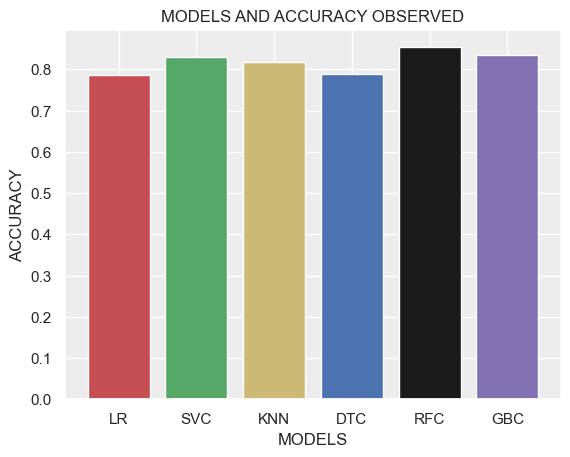

In [35]:
model_acc = {'LR' : acc1 , 'SVC':acc2 , 'KNN':acc3 ,'DTC':acc4 ,'RFC':acc5 ,'GBC' :acc6 }

plt.bar(model_acc.keys() , model_acc.values() ,color= ['r','g','y','b','k' ,'m'])
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.title('MODELS AND ACCURACY OBSERVED')

### Conclusion
#### Random Forest Classifier had the highest accuracy,precision,recall and F1 score and is therefore the best model to evaluate Customer churn

### Recommendations
#### 1. Recognize and appreciate customers that are still with the bank. This would encourage them to stay.
#### 2. Campaigns and special offers should be made  to customers in Germany 
#### 3. Special offers should also be made to inactive customers 
#### 4. Improving customer experience would help to retain more people
#### 5. Educate customers on new products and offers

